In [119]:
%load_ext autoreload
%autoreload 2
from utils.arima_utils import *
from utils.helper import *
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [120]:
from utils import pipe_def_arima

In [121]:
root = '/Users/thorey/Documents/project/competition/fognet/models/bbking/arima/'

# TODO LIST

## TO-DO
2. Implement random sampling feature space

5. TODO VARMAX model avec micro data et x exodata

## DONE

3. Recursive FIT EM-like estiamtion - improve the score a tiny bit !

4. TODO DOES SARIMAX perform the same if we input the nan with time interpolation ?

    - **Rapport**

        - Significant improvement in the performance when we use time interpolation for yield
        - We implement it in the pipeline as a yield arg !
        
3. Try only with ARIMA, pas SARIMAX
    - ** Rapport **
        - Ne fonctionne pas car n'a pas de possibilite de faire de la bonne forecast. mod.filter pas implementer !
        
6. Essayer d'enlever le Standard scaler
    - ** Rapport **
        - Ca ne change rien
        
2. Implement avec PCA en premier pour voir si ca a de l'effet
    - ** Rapport **
        - Oui ca a de l'effet, implementer !

In [180]:
from utils.arima_utils import *
config = parse_conf_file(os.path.join(root,'model_0','conf_model.json'))
model = ArimaModel(config=config,mode='train')

Loading the prepro pipeline
Set up the checkpoints


In [181]:
model.train()

Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation


/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation


/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
train summary:
    rmse : 1.825
    aic : 7377.840
    bic : 7583.698
    hqic : 7453.998
test summary:
    rmse : 0.904
    aic : 2084.483
    bic : 2248.611
    hqic : 2148.414


In [185]:
from utils.arima_utils import *
config = parse_conf_file(os.path.join(os.path.expanduser(model.folder),'conf_model.json'))
model_insp = ArimaModel(config=config,mode='inspection')

Loading the prepro pipeline
Loading model params for group1 from /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_0/AR_0_MA_1_D_1/model_group1.pkl
Loading model params for group0 from /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_0/AR_0_MA_1_D_1/model_group0.pkl
Loading model params for group3 from /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_0/AR_0_MA_1_D_1/model_group3.pkl


In [186]:
model_insp.predict()

Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
train summary:
    rmse : 1.825
    aic : 7377.840
    bic : 7583.698
    hqic : 7453.998
test summary:
    rmse : 0.904
    aic : 2084.483
    bic : 2248.611
    hqic : 2148.414


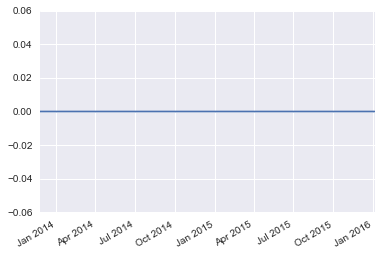

In [188]:
model_insp.df.yield_pred.plot()

In [140]:
df0 = model.dfgroup.get_group('group0')
train,test = train_test_split(df0)

Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation


In [153]:
model.get_scores('group0',test)

[1.2816922748018493,
 3837.1136960870235,
 4024.3608965255994,
 3908.2122551901325,
 1020]

In [156]:
model.update_main_df('group0',gp)

In [155]:
gp

,feat_yield,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,...,aga_DD,aga_Ff,aga_ff10,aga_WW,aga_W'W',aga_c,aga_VV,aga_Td,group,yield_pred
2015-08-03 14:00:00,0,1.114465,-0.197217,-0.209284,-0.874422,-0.142061,1.681099,1.002294,0.591712,-0.183449,...,Wind blowing from the west-southwest,6,NaN,NaN,NaN,No Significant Clouds,10.0 and more,17,group3,0
2015-08-03 16:00:00,0,1.114465,-0.197217,-0.209284,-0.874422,-0.142061,1.681099,1.002294,0.591712,-0.183449,...,Wind blowing from the west-southwest,6,NaN,NaN,NaN,Few clouds (10-30%) 480 m,10.0 and more,16,group3,0
2015-08-03 18:00:00,0,1.144622,-0.340115,-0.350510,-0.729301,-0.331935,2.275865,1.002294,0.537285,0.344257,...,Wind blowing from the south-southwest,3,NaN,NaN,NaN,No Significant Clouds,10.0 and more,16,group3,0
2015-08-03 20:00:00,0,1.144622,-0.340115,-0.350510,-0.729301,-0.331935,2.275865,1.002294,0.537285,0.344257,...,Wind blowing from the south,4,NaN,NaN,NaN,No Significant Clouds,10.0 and more,16,group3,0
2015-08-03 22:00:00,0,1.144622,-0.340115,-0.350510,-0.729301,-0.331935,2.275865,1.002294,0.537285,0.344257,...,Wind blowing from the south,3,NaN,NaN,NaN,No Significant Clouds,10.0 and more,17,group3,0
2015-08-04 00:00:00,0,1.144622,-0.340115,-0.350510,-0.729301,-0.331935,2.275865,1.002294,0.537285,0.344257,...,"Calm, no wind",0,NaN,NaN,NaN,No Significant Clouds,10.0 and more,17,group3,0
2015-08-04 02:00:00,0,1.144622,-0.340115,-0.350510,-0.729301,-0.331935,2.275865,1.002294,0.537285,0.344257,...,"Calm, no wind",0,NaN,NaN,NaN,No Significant Clouds,10.0 and more,16,group3,0
2015-08-04 04:00:00,0,1.144622,-0.340115,-0.350510,-0.729301,-0.331935,2.275865,1.002294,0.537285,0.344257,...,Wind blowing from the west,1,NaN,NaN,NaN,No Significant Clouds,10.0 and more,16,group3,0
2015-08-04 06:00:00,0,0.119258,-0.797388,-0.802434,-0.729301,0.933896,-0.103199,0.932732,0.537285,-0.711154,...,Wind blowing from the west,2,NaN,NaN,NaN,"Scattered clouds (40-50%) 240 m, broken clouds...",10.0 and more,17,group3,0
2015-08-04 08:00:00,0,0.179573,-0.683070,-0.689453,0.576784,0.807313,0.491567,0.932732,0.537285,-0.711154,...,"Calm, no wind",0,NaN,NaN,NaN,"Scattered clouds (40-50%) 240 m, broken clouds...",10.0 and more,18,group3,0


In [151]:
model.train()

Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
train summary:
    rmse : 100000.000
    aic : 100000.000
    bic : 100000.000
    hqic : 100000.000
test summary:
    rmse : 2.000
    aic : 2.000
    bic : 2.000
    hqic : 2.000


TypeError: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x121cb8210> is not JSON serializable

In [135]:
            df_model = model.get_model_architecture(train)
            df_results = df_model.fit(maxiter=100, disp=1)

In [136]:
df_results

In [ ]:
df_resultsultss

In [125]:
model.fit(model.df)

third try


ValueError: 

In [104]:
model.params_group0

[autoreload of utils.arima_utils failed: Traceback (most recent call last):
  File "/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
  File "utils/arima_utils.py", line 176
    def iterative_fit(self, epsilon_threeshold):
      ^
IndentationError: expected an indented block
]


feat_0     4.681099e-01
feat_1     7.995832e-01
feat_2    -4.557650e-01
feat_3    -9.346223e-02
feat_4     4.962536e-01
feat_5    -2.779085e-02
feat_6    -1.083388e-01
feat_7     1.973641e-01
feat_8    -2.408663e-03
feat_9    -2.966867e-01
feat_10   -7.648840e-02
feat_11    3.323790e-02
feat_12    1.954788e-16
feat_13   -1.820818e-01
feat_14    1.226888e+00
feat_15   -7.753842e-03
feat_16    1.393780e+00
feat_17   -2.809595e+00
feat_18    3.547140e+00
feat_19    1.172686e+00
feat_20    4.482022e-01
feat_21    3.007285e-01
feat_22   -7.207876e-02
feat_23    1.012638e+00
feat_24    7.594804e-02
feat_25    3.604874e-02
feat_26   -7.780199e-02
feat_27    2.314502e+00
feat_28   -2.120518e+00
feat_29   -6.956145e-01
feat_30   -2.811122e-01
feat_31    3.361432e-01
feat_32    5.483801e-01
feat_33    5.835140e-01
feat_34   -3.476975e-02
feat_35   -3.851115e-03
ma.L1     -3.086090e-02
sigma2     4.372129e+00
dtype: float64

In [102]:
model.get_model(train)

NameError: name 'train' is not defined

In [85]:
model.train()

Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation


/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation


/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Will write output to ~/Documents/project/competition/fognet/models/bbking/arima/model_0/AR_0_MA_1_D_1/submissions_20160408_152939.csv
train summary:
    rmse : 1.825
    aic : 7377.840
    bic : 7583.698
    hqic : 7453.998
test summary:
    rmse : 0.904
    aic : 2084.483
    bic : 2248.611
    hqic : 2148.414


In [63]:
model.order,model.seasonal_order

((0, 1, 1), (0, 0, 0, 0))

In [68]:
for name,gp in model.dfgroup:
    print name

group0
group1
group3


In [77]:
model.fit_group(name,gp)

Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation


/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


([1.1714420232523794,
  4228.1838761035497,
  4427.0551820111641,
  4302.5663566949088,
  1385],
 [0.21128564093178817,
  1033.5371103243644,
  1190.6885761854705,
  1095.408873778325,
  462])

In [73]:
model.save_group3.path=='/Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_0/AR_0_MA_1_D_1/model_group3.pkl'

False

In [74]:
model.save_group3.path

u'~/Documents/project/competition/fognet/models/bbking/arima/model_0/AR_0_MA_1_D_1/model_group3.pkl'

In [61]:
model.fit()

Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
train summary:
    rmse : 100000.000
    aic : 100000.000
    bic : 100000.000
    hqic : 100000.000
test summary:
    rmse : 2.000
    aic : 2.000
    bic : 2.000
    hqic : 2.000


In [58]:
        unwanted = ['df', 'architecture', 'pipeline', 'pipeline_yield']
        unwanted += ['save_' + group for group in model.dfgroup.groups.keys()]

In [59]:
unwanted

['df',
 'architecture',
 'pipeline',
 'pipeline_yield',
 'save_group1',
 'save_group0',
 'save_group3']

In [49]:

dfg = model.df.groupby('group')

In [51]:
dfg.groups.keys()

['group1', 'group0', 'group3']

In [18]:
mod = model.get_model(model.df)

In [37]:
mres = mod.fit()

In [ ]:
model.mo

In [105]:
from utils.hook import SaveArimaParameters

In [106]:
a = SaveArimaParameters(name)

In [112]:
name = os.path.join(os.getcwd(),'test.pkl')

In [113]:
a(mres)

In [114]:
os.getcwd()

'/Users/thorey/Documents/project/competition/fognet'

In [115]:
import pickle

In [116]:
with open(name) as f:
    b = pickle.load(f)

In [117]:
b

feat_0     1.375119e-01
feat_1    -1.924005e+00
feat_2     1.749756e+00
feat_3     1.555272e-02
feat_4     1.607059e-01
feat_5     1.584824e-03
feat_6    -1.522976e-01
feat_7    -2.399106e-01
feat_8     5.510599e-02
feat_9    -7.119296e-02
feat_10   -7.949035e-02
feat_11   -2.412112e-01
feat_12   -3.011499e-15
feat_13    1.100941e-01
feat_14    9.900238e-01
feat_15    2.949102e-03
feat_16    1.163514e+00
feat_17   -1.282680e+00
feat_18    1.768532e+00
feat_19    6.713874e-01
feat_20    1.891168e-01
feat_21    4.183713e-01
feat_22   -4.185914e-02
feat_23    4.665872e-01
feat_24    3.234409e-02
feat_25    1.147793e-01
feat_26    4.838382e-02
feat_27    1.847405e+00
feat_28   -1.880115e+00
feat_29    6.461015e-01
feat_30   -1.221039e-01
feat_31   -1.104635e-02
feat_32    2.922087e-01
feat_33   -9.042886e-01
feat_34   -4.618590e-02
feat_35    1.685940e-03
ma.L1     -5.384763e-02
sigma2     3.074295e+00
dtype: float64

In [48]:
mod.filter(b)

In [132]:
model.AR = 3
model.D = 1
model.Season_Period = 0
model.AR = 4
model.Season_MA = 0
model.Season_D = 0
model.Season_AR = 0
model.init_model()

Set up the checkpoints


In [134]:
model.fit(maxiter=100)

  0%|          | 0/3 [00:00<?, ?it/s]

Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation


/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
 33%|███▎      | 1/3 [00:45<01:31, 45.55s/it]

Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation


/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
 67%|██████▋   | 2/3 [01:03<00:37, 37.29s/it]

Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation


/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Will write output to ~/Documents/project/competition/fognet/models/bbking/arima/model_0/AR_0_MA_1_D_1/submissions_20160408_121743.csv
train summary:
    rmse : 1.723
    aic : 7153.892
    bic : 7381.420
    hqic : 7238.067
test summary:
    rmse : 0.878
    aic : 2037.992
    bic : 2219.398
    hqic : 2108.653


In [129]:
model.get_model(model.df)

# implementing recursive fit procedure

In [121]:
from utils.arima_utils import *
config = parse_conf_file(os.path.join(root,'model_0','conf_model.json'))
model = ArimaModel(config=config)

{'AR': 0, 'MA': 1, 'D': 1}
Loading the prepro pipeline
Set up the checkpoints


In [120]:
model.iterative_fit()

  0%|          | 0/3 [00:00<?, ?it/s]

Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation


 33%|███▎      | 1/3 [00:21<00:43, 21.91s/it]

Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation


/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
 67%|██████▋   | 2/3 [00:35<00:19, 19.38s/it]

Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation


/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 ieme iterations, error 0.466


  0%|          | 0/3 [00:00<?, ?it/s]

Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation


 33%|███▎      | 1/3 [00:24<00:48, 24.30s/it]

Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation


/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
 67%|██████▋   | 2/3 [00:39<00:21, 21.49s/it]

Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation


/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 ieme iterations, error 0.368


  0%|          | 0/3 [00:00<?, ?it/s]

Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation


 33%|███▎      | 1/3 [00:23<00:47, 23.97s/it]

Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation


/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
 67%|██████▋   | 2/3 [00:37<00:20, 20.90s/it]

Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation


/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 ieme iterations, error 0.273


  0%|          | 0/3 [00:00<?, ?it/s]

Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation


 33%|███▎      | 1/3 [00:24<00:49, 24.61s/it]

Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation


/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
 67%|██████▋   | 2/3 [00:38<00:21, 21.28s/it]

Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation


/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3 ieme iterations, error 0.201


  0%|          | 0/3 [00:00<?, ?it/s]

Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation


 33%|███▎      | 1/3 [00:25<00:50, 25.40s/it]

Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation


/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
 67%|██████▋   | 2/3 [00:38<00:21, 21.66s/it]

Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation


/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


4 ieme iterations, error 0.162


  0%|          | 0/3 [00:00<?, ?it/s]

Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation


 33%|███▎      | 1/3 [00:24<00:49, 24.85s/it]

Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation


/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
 67%|██████▋   | 2/3 [00:37<00:21, 21.29s/it]

Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation


/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Will write output to ~/Documents/project/competition/fognet/models/bbking/arima/model_0/AR_0_MA_1_D_1/submissions_20160408_112916.csv
train summary:
    rmse : 1.794
    aic : 7307.732
    bic : 7513.591
    hqic : 7383.891
test summary:
    rmse : 0.939
    aic : 2071.534
    bic : 2235.662
    hqic : 2135.465


# Implement random sampling feature space

In [75]:
from utils.arima_utils import *
config = parse_conf_file(os.path.join(root,'model_0','conf_model.json'))
model = ArimaModel(config=config)
model.AR = 0
model.D = 1
model.MA = 0
model.pca_components = 10
model.init_data()
model.init_model()

{'AR': 0, 'MA': 1, 'D': 1}
Loading the prepro pipeline
Set up the checkpoints
Loading the prepro pipeline
Set up the checkpoints


In [76]:
model.fit()

  0%|          | 0/3 [00:00<?, ?it/s]

Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
train summary:
    rmse : 100000.000
    aic : 100000.000
    bic : 100000.000
    hqic : 100000.000
test summary:
    rmse : 2.000
    aic : 2.000
    bic : 2.000
    hqic : 2.000


In [74]:
train,test = train_test_split(df)
mod2=sm.tsa.SARIMAX(endog = train['feat_yield'],
                    exog = train[model.regressors],
                    order = (0,1,0),
                    enforce_stationarity = False,
                    enforce_invertibility = False)

Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation


ValueError: could not broadcast input array from shape (0,0) into shape (1,1)

In [70]:
model.verbose = 2
df = model.df
df = df.groupby('group').get_group('group1')
model.fit_group(df)

Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation


ValueError: could not broadcast input array from shape (0,0) into shape (1,1)

In [11]:
model.Season_AR

0

In [4]:
df = model.df
df0 = df.groupby('group').get_group('group0')
train,test = train_test_split(df0)

Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation


In [ ]:
{u'Season_RA': 3, u'D': 1, u'Season_Period': 1, u'AR': 2, u'Season_MA': 1, u'Season_D': 1, u'MA': 3}

In [71]:
mod2=sm.tsa.SARIMAX(endog = train['feat_yield'],
                    exog = train[model.regressors],
                    order = (0,1,0),
                    seasonal_order = (3,1,1,1),
                    enforce_stationarity = False,
                    enforce_invertibility = False)

KeyError: "['feat_9'] not in index"

In [21]:
res = mod2.fit()

/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [22]:
print(res.summary())

                                 Statespace Model Results                                
Dep. Variable:                        feat_yield   No. Observations:                 3058
Model:             SARIMAX(2, 1, 3)x(3, 1, 1, 1)   Log Likelihood               -6412.596
Date:                           Thu, 07 Apr 2016   AIC                          12863.193
Time:                                   14:47:02   BIC                          12977.678
Sample:                               11-23-2013   HQIC                         12904.333
                                    - 08-09-2014                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
feat_0        -0.0984      0.141     -0.696      0.487      -0.376       0.179
feat_1         1.2180      0.033     37.375

In [469]:
sm.tsa.SARIMAX?

In [437]:
sm.tsa.SARIMAX?

In [435]:
model.fit()

  0%|          | 0/3 [00:00<?, ?it/s]

Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
                           Statespace Model Results                           
Dep. Variable:             feat_yield   No. Observations:                 3058
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -6608.933
Date:                Thu, 07 Apr 2016   AIC                          13239.866
Time:                        14:03:30   BIC                          13306.147
Sample:                    11-23-2013   HQIC                         13263.684
                         - 08-09-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
feat_0        -0.1855      0.143     -1.299      0.194      -0.465       0.094
feat_1         1.2447     

 33%|███▎      | 1/3 [00:03<00:06,  3.33s/it]

Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
                           Statespace Model Results                           
Dep. Variable:             feat_yield   No. Observations:                 1089
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -2295.060
Date:                Thu, 07 Apr 2016   AIC                           4612.120
Time:                        14:03:33   BIC                           4667.044
Sample:                    12-01-2014   HQIC                          4632.908
                         - 03-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
feat_0        -0.0057      0.134     -0.043      0.966      -0.269       0.257
feat_1         1.6478      

 67%|██████▋   | 2/3 [00:05<00:03,  3.09s/it]

Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
                           Statespace Model Results                           
Dep. Variable:             feat_yield   No. Observations:                 1385
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -2093.254
Date:                Thu, 07 Apr 2016   AIC                           4208.508
Time:                        14:03:35   BIC                           4266.076
Sample:                    08-03-2015   HQIC                          4230.040
                         - 11-26-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
feat_0        -0.2556      0.112     -2.278      0.023      -0.475      -0.036
feat_1         0.5697      

Will write output to ~/Documents/project/competition/fognet/models/bbking/arima/model_0/AR_0_MA_1_D_1/submissions_20160407_140336.csv
train summary:
    rmse : 1.898
    aic : 7353.498
    bic : 7413.089
    hqic : 7375.544
test summary:
    rmse : 0.919
    aic : 2019.872
    bic : 2067.383
    hqic : 2038.379


# Implement avec PCA en premier pour voir si ca a de l'effet

In [355]:
from utils.arima_utils import *
config = parse_conf_file(os.path.join(root,'model_2','conf_model.json'))
model = ArimaModel(config=config)

{'AR': 0, 'MA': 1, 'D': 1}
Loading the prepro pipeline
Set up the checkpoints


In [356]:
model.fit()

  0%|          | 0/3 [00:00<?, ?it/s]

Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
                           Statespace Model Results                           
Dep. Variable:             feat_yield   No. Observations:                 3058
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -6724.266
Date:                Thu, 07 Apr 2016   AIC                          13458.532
Time:                        12:20:28   BIC                          13488.659
Sample:                    11-23-2013   HQIC                         13469.358
                         - 08-09-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
feat_0         1.5226      0.037     40.638      0.000       1.449       1.596
feat_1        -0.1615     

 33%|███▎      | 1/3 [00:02<00:04,  2.32s/it]

Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
                           Statespace Model Results                           
Dep. Variable:             feat_yield   No. Observations:                 1089
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -2340.729
Date:                Thu, 07 Apr 2016   AIC                           4691.459
Time:                        12:20:29   BIC                           4716.424
Sample:                    12-01-2014   HQIC                          4700.908
                         - 03-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
feat_0         1.5673      0.075     20.774      0.000       1.419       1.715
feat_1        -0.2732      

 67%|██████▋   | 2/3 [00:03<00:01,  1.90s/it]

Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
                           Statespace Model Results                           
Dep. Variable:             feat_yield   No. Observations:                 1385
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -2141.517
Date:                Thu, 07 Apr 2016   AIC                           4293.035
Time:                        12:20:30   BIC                           4319.202
Sample:                    08-03-2015   HQIC                          4302.822
                         - 11-26-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
feat_0         0.4765      0.035     13.640      0.000       0.408       0.545
feat_1        -0.1429      

Will write output to ~/Documents/project/competition/fognet/models/bbking/arima/model_2/AR_0_MA_1_D_1/submissions_20160407_122031.csv
train summary:
    rmse : 1.989
    aic : 7481.008
    bic : 7508.095
    hqic : 7491.029
test summary:
    rmse : 0.949
    aic : 2037.312
    bic : 2058.908
    hqic : 2045.724


In [ ]:
train summary:
    rmse : 1.964
    aic : 7434.571
    bic : 7477.910
    hqic : 7450.604
test summary:
    rmse : 0.998
    aic : 2039.104
    bic : 2073.657
    hqic : 2052.563

#  Try only with ARIMA, pas SARIMAX

**Rapport**


In [427]:
from utils.arima_utils import *
config = parse_conf_file(os.path.join(root,'model_0','conf_model.json'))
model = ArimaModel(config=config)
model.AR = 5
model.init_model()

{'AR': 0, 'MA': 1, 'D': 1}
Loading the prepro pipeline
Set up the checkpoints
Set up the checkpoints


In [428]:
model.fit()

  0%|          | 0/3 [00:00<?, ?it/s]

Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
                             ARIMA Model Results                              
Dep. Variable:           D.feat_yield   No. Observations:                 3057
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -6836.561
Method:                       css-mle   S.D. of innovations              2.264
Date:                Thu, 07 Apr 2016   AIC                          13707.121
Time:                        13:59:55   BIC                          13809.550
Sample:                    11-23-2013   HQIC                         13743.929
                         - 08-09-2014                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0837      0.032      2.587      0.010       0.020       0.147
fe

AttributeError: 'ARIMA' object has no attribute 'filter'

In [429]:
model.which_architecture = 'ARIMA'

In [430]:
model.init_model()

Set up the checkpoints


In [433]:
sm.tsa.SARIMAX?

In [431]:
m = sm.tsa.ARIMA(endog = model.df['feat_yield'],
            exog = model.df[model.regressors],
            order = model.order)

In [432]:
m.filter(res.params)

AttributeError: 'ARIMA' object has no attribute 'filter'

In [190]:
df.join?

In [182]:
len(res.fittedvalues),len(model.df)

(7377, 7377)

# Does SARIMAX perform the same if we input the nan with time interpolation

**Rapport**

- Significant improvement in the performance when we use time interpolation for yield
- We implement it in the pipeline as a yield arg !

In [154]:
from utils.arima_utils import *

In [159]:
# On prend le meilleur model pour l'instant
config = parse_conf_file(os.path.join(root,'model_0','conf_model.json'))
model = ArimaModel(config=config)
model.verbose = 0
model.Season_AR = 1
model.Season_Period = 0
model.AR = 3
model.Season_MA =0
model.MA = 1

model.init_model()

{'AR': 0, 'MA': 1, 'D': 1}
Loading the prepro pipeline
Set up the checkpoints
Set up the checkpoints


In [160]:
model.seasonal_order

(1, 0, 0, 0)

In [161]:
model.fit()

  0%|          | 0/3 [00:00<?, ?it/s]

Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation


/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
 33%|███▎      | 1/3 [00:15<00:30, 15.24s/it]

Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation


/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
 67%|██████▋   | 2/3 [00:21<00:12, 12.55s/it]

Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation


/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Will write output to ~/Documents/project/competition/fognet/models/bbking/arima/model_0/AR_0_MA_1_D_1/submissions_20160407_103505.csv
train summary:
    rmse : 1.777
    aic : 7131.676
    bic : 7212.936
    hqic : 7161.739
test summary:
    rmse : 0.903
    aic : 1976.788
    bic : 2041.576
    hqic : 2002.025
